# Housing Market Analysis For USA

## Problem Statement
**Find publicly available data** for **key factors** that **influence US home prices nationally**. Then, **build** a **data science model** that **explains how these factors impacted home prices** over the last 20 years. Use the **S&P Case-Schiller Home Price Index** as a proxy for home prices.

## Overview
**The housing market** is **influenced** by the **state of the economy**, **interest rates**, **real income** and **construction costs**. As well as these demand-side factors, **house prices** will be **determined by available supply**. With periods of **rising demand** and **limited supply**, we will see **rising house prices**.


## Factors Affecting Housing Market

#### 1. Unemployment Rate 

#### 2. Median Household Income

#### 3. Mortgage Interest rate

#### 4. Inflation Rate

#### 5. GDP per capita

#### 6. Construction costs

#### 7. Monthly Supply of New Houses

#### 8. Working Population

#### 9. Housing Subsidies

#### 10. Household Estimates

#### 11. Consumer Sentiments

#### 12. Recession

## Problem Solving Approach

#### Dataset
1. **No such dataset is readily available.** 
2. So we **need to do** a **little research** and **gather Time-Series data** for the last 20 years      for all the **above factors** mentioned.
3. We are **collecting data** from **Jan 2001 to Dec 2021** on a **monthly basis.**

#### Machine Learning Model
1. Once we **gather all the Time-Series data** we will **put** them into **one Pandas Dataframe.**
2. We will use **12 factors affecting the housing market** as our **12 Features.**
3. Our **target output** will be **S&P Case-Schiller Home Price Index**.
4. Our **Machine Learning Model** will try to **predict** the **target value** by **establishing the relation between 12 features and the target value.**
5. We will use **XGBoost Regression Model** as it is a **Regression problem.**

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

## EDA and Feature Engineering

1. Collect all **12 features Time-Series data** and put them into **one folder.**
2. **Read** the individual **data file.**
3. Make the **DATE column** as **pandas DATETIME** and keep only **Month** and **Year.**
4. **Rename** the **information column** from Time-Series data.
5. Convert **GPD, House_Subsidies and Median_Household_Income** data from **annual to monthly.**
6. Convert *Mortgage Interest rate** from **weekly to monthly** by taking **average.**
7. Create a Excel file for **Recession** by making, **1 for Recession** and **0 for No Recession**,      for Recession month and year between **Jan 2011 to Dec 2021.**
8. Add **Recession** as a **new feature.**
9. **Merge** all **12 features** into one **Dataframe** using the DATE column.
10. Make **Month** and **Year** as **two new features.**
11. **Delete** the **DATE column** as we no longer need it.
12. Plot the **Boxplot** to find out **Outliners.**
13. Plot the **Heatmap** to **visualize the strength of correlation among variables.**
14. Use **info()** to make sure that **all features** are **numeric** and all **null** values are **removed.**

In [2]:
# Read and view the file 

unrate = pd.read_csv('Unemployment_Rate.csv')

unrate

,DATE,UNRATE
0,2001-01-01,4.2
1,2001-02-01,4.2
2,2001-03-01,4.3
3,2001-04-01,4.4
4,2001-05-01,4.3
...,...,...
267,2023-04-01,3.4
268,2023-05-01,3.7
269,2023-06-01,3.6
270,2023-07-01,3.5


In [3]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

unrate['DATE'] = pd.to_datetime(unrate['DATE']).dt.to_period('M')

unrate.rename(columns={'UNRATE':'Unemployment_Rate(%)'}, inplace=True)

unrate

,DATE,Unemployment_Rate(%)
0,2001-01,4.2
1,2001-02,4.2
2,2001-03,4.3
3,2001-04,4.4
4,2001-05,4.3
...,...,...
267,2023-04,3.4
268,2023-05,3.7
269,2023-06,3.6
270,2023-07,3.5


In [4]:
# Read and view the file 

Construction_Prices = pd.read_csv('Construction_Prices.csv')

Construction_Prices

,DATE,WPUSI012011
0,2001-01-01,142.000
1,2001-02-01,142.400
2,2001-03-01,142.400
3,2001-04-01,142.500
4,2001-05-01,144.200
...,...,...
266,2023-03-01,331.729
267,2023-04-01,333.549
268,2023-05-01,338.154
269,2023-06-01,337.953


In [5]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Construction_Prices['DATE'] = pd.to_datetime(Construction_Prices['DATE']).dt.to_period('M')

Construction_Prices.rename(columns={'WPUSI012011':'Construction_Cost_Index'}, inplace=True)

Construction_Prices

,DATE,Construction_Cost_Index
0,2001-01,142.000
1,2001-02,142.400
2,2001-03,142.400
3,2001-04,142.500
4,2001-05,144.200
...,...,...
266,2023-03,331.729
267,2023-04,333.549
268,2023-05,338.154
269,2023-06,337.953


In [6]:
# Read and view the file 

Consumer_Sentiments = pd.read_csv('Consumer_Sentiments.csv')

Consumer_Sentiments.head()

,DATE,UMCSENT
0,2001-01-01,94.7
1,2001-02-01,90.6
2,2001-03-01,91.5
3,2001-04-01,88.4
4,2001-05-01,92.0


In [7]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Consumer_Sentiments['DATE'] = pd.to_datetime(Consumer_Sentiments['DATE']).dt.to_period('M')

Consumer_Sentiments.rename(columns={'UMCSENT':'Consumer_Sentiments_Index'}, inplace=True)

Consumer_Sentiments

,DATE,Consumer_Sentiments_Index
0,2001-01,94.7
1,2001-02,90.6
2,2001-03,91.5
3,2001-04,88.4
4,2001-05,92.0
...,...,...
266,2023-03,62.0
267,2023-04,63.5
268,2023-05,59.2
269,2023-06,64.4


In [8]:
# Read and view the file 

GDP = pd.read_csv('GDP.csv')

GDP.head()

,DATE,A939RC0A052NBEA
0,2001-01-01,37100.0
1,2002-01-01,37954.0
2,2003-01-01,39420.0
3,2004-01-01,41660.0
4,2005-01-01,44052.0


In [9]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

GDP['DATE'] = pd.to_datetime(GDP['DATE']).dt.to_period('M')

GDP.rename(columns={'A939RC0A052NBEA':'GDP_Per_Capita($)'}, inplace=True)

GDP

,DATE,GDP_Per_Capita($)
0,2001-01,37100.0
1,2002-01,37954.0
2,2003-01,39420.0
3,2004-01,41660.0
4,2005-01,44052.0
5,2006-01,46234.0
6,2007-01,47976.0
7,2008-01,48498.0
8,2009-01,47123.0
9,2010-01,48570.0


In [10]:
# let us convert GDP data Annually to monthly Using Pandas resample method

GDP = GDP.set_index('DATE').resample('M').ffill().reset_index()
GDP.head()

,DATE,GDP_Per_Capita($)
0,2001-01,37100.0
1,2001-02,37100.0
2,2001-03,37100.0
3,2001-04,37100.0
4,2001-05,37100.0


In [11]:
# As we can see pandas is not resampling last year value
GDP[245:]

,DATE,GDP_Per_Capita($)
245,2021-06,70152.0
246,2021-07,70152.0
247,2021-08,70152.0
248,2021-09,70152.0
249,2021-10,70152.0
250,2021-11,70152.0
251,2021-12,70152.0
252,2022-01,76328.0


In [12]:
# So, we will begin from starting by reading file 

GDP = pd.read_csv('GDP.csv')

# Rename the information column 

GDP.rename(columns={'A939RC0A052NBEA':'GDP_Per_Capita($)'}, inplace=True)

# Add a dummy data as a last value as shown below

GDP_new = {'DATE':'2023-01-01', 'GDP_Per_Capita($)':0}

GDP = GDP.append(GDP_new, ignore_index=True)

GDP.tail()

,DATE,GDP_Per_Capita($)
18,2019-01-01,64690.0
19,2020-01-01,63476.0
20,2021-01-01,70152.0
21,2022-01-01,76328.0
22,2023-01-01,0.0


In [13]:
# Make DATE column as pandas DATETIME format

GDP['DATE'] = pd.to_datetime(GDP['DATE']).dt.to_period('M')

GDP.tail()

,DATE,GDP_Per_Capita($)
18,2019-01,64690.0
19,2020-01,63476.0
20,2021-01,70152.0
21,2022-01,76328.0
22,2023-01,0.0


In [14]:
# Convet Annual data to monthly by resampling

GDP = GDP.set_index('DATE').resample('M').ffill().reset_index()

# Delete the dummy value we added 

GDP = GDP.drop([264])

GDP.tail()

,DATE,GDP_Per_Capita($)
259,2022-08,76328.0
260,2022-09,76328.0
261,2022-10,76328.0
262,2022-11,76328.0
263,2022-12,76328.0


In [15]:
# Read and view the file

House_Subsidies = pd.read_csv('House_Subsidies.csv')

House_Subsidies.tail()

,DATE,L312051A027NBEA
16,01-01-2017,35.771
17,01-01-2018,38.859
18,01-01-2019,40.185
19,01-01-2020,44.147
20,01-01-2021,45.296


In [16]:
# Rename the information column

House_Subsidies.rename(columns={'L312051A027NBEA':'Housing_Subsidies(Billions_of_$)'}, inplace=True)

# Add a dummy data as a last value as shown below

House_Subsidies_new = {'DATE':'01-01-2022', 'Housing_Subsidies(Billions_of_$)':0}

House_Subsidies = House_Subsidies.append(House_Subsidies_new, ignore_index=True)

House_Subsidies.tail()

,DATE,Housing_Subsidies(Billions_of_$)
17,01-01-2018,38.859
18,01-01-2019,40.185
19,01-01-2020,44.147
20,01-01-2021,45.296
21,01-01-2022,0.000


In [17]:
# Make DATE column as pandas DATETIME format and keep only Month and Year

House_Subsidies['DATE'] = pd.to_datetime(House_Subsidies['DATE']).dt.to_period('M')

House_Subsidies.tail()

,DATE,Housing_Subsidies(Billions_of_$)
17,2018-01,38.859
18,2019-01,40.185
19,2020-01,44.147
20,2021-01,45.296
21,2022-01,0.000


In [18]:
# let us convert Housing_Subsidies_Index data Annually to monthly Using Pandas resample method

House_Subsidies = House_Subsidies.set_index('DATE').resample('M').ffill().reset_index()

House_Subsidies = House_Subsidies.drop([252])

House_Subsidies

,DATE,Housing_Subsidies(Billions_of_$)
0,2001-01,20.573
1,2001-02,20.573
2,2001-03,20.573
3,2001-04,20.573
4,2001-05,20.573
...,...,...
247,2021-08,45.296
248,2021-09,45.296
249,2021-10,45.296
250,2021-11,45.296


In [19]:
# Read and view the file

Inflation_Rate = pd.read_csv('Inflation_Rate.csv')

Inflation_Rate.head()

,DATE,CPALTT01USM661S
0,2001-01-01,74.087513
1,2001-02-01,74.256277
2,2001-03-01,74.298468
3,2001-04-01,74.425041
4,2001-05-01,74.804761


In [20]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Inflation_Rate['DATE'] = pd.to_datetime(Inflation_Rate['DATE']).dt.to_period('M')

Inflation_Rate.rename(columns={'CPALTT01USM661S':'Consumer_Price_Index'}, inplace=True)

Inflation_Rate.head()

,DATE,Consumer_Price_Index
0,2001-01,74.087513
1,2001-02,74.256277
2,2001-03,74.298468
3,2001-04,74.425041
4,2001-05,74.804761


In [21]:
# Read and view the file

Mortgage_Rate = pd.read_csv('Mortgage_Rate.csv')

Mortgage_Rate.head()

,DATE,MORTGAGE30US
0,2001-01-05,7.07
1,2001-01-12,6.89
2,2001-01-19,7.02
3,2001-01-26,7.15
4,2001-02-02,7.09


In [22]:
# Make DATE column as pandas DATETIME and rename the information column

Mortgage_Rate['DATE'] = pd.to_datetime(Mortgage_Rate['DATE'])

Mortgage_Rate.rename(columns={'MORTGAGE30US':'Mortgage_AVG_Int_Rates(%)'}, inplace=True)

Mortgage_Rate.head()

,DATE,Mortgage_AVG_Int_Rates(%)
0,2001-01-05,7.07
1,2001-01-12,6.89
2,2001-01-19,7.02
3,2001-01-26,7.15
4,2001-02-02,7.09


In [23]:
# let us convert Mortgage Rate data Weekly to monthly Using Pandas resample method

Mortgage_Rate = Mortgage_Rate.set_index('DATE').resample('M').mean().reset_index()

Mortgage_Rate.head(20)

,DATE,Mortgage_AVG_Int_Rates(%)
0,2001-01-31,7.0325
1,2001-02-28,7.0500
2,2001-03-31,6.9520
3,2001-04-30,7.0775
4,2001-05-31,7.1450
5,2001-06-30,7.1600
6,2001-07-31,7.1275
7,2001-08-31,6.9500
8,2001-09-30,6.8175
9,2001-10-31,6.6175


In [24]:
# let us keep only Year and Month in date column

Mortgage_Rate['DATE'] = Mortgage_Rate['DATE'].dt.to_period('M')

Mortgage_Rate

,DATE,Mortgage_AVG_Int_Rates(%)
0,2001-01,7.0325
1,2001-02,7.0500
2,2001-03,6.9520
3,2001-04,7.0775
4,2001-05,7.1450
...,...,...
268,2023-05,6.4250
269,2023-06,6.7140
270,2023-07,6.8400
271,2023-08,7.0720


In [25]:
# Read and view the file

Median_Household_Income = pd.read_csv('Median_Household_Income.csv')

Median_Household_Income.tail()

,DATE,MEHOINUSA646N
16,2017-01-01,61136
17,2018-01-01,63179
18,2019-01-01,68703
19,2020-01-01,68010
20,2021-01-01,70784


In [26]:
# Rename the information column

Median_Household_Income.rename(columns={'MEHOINUSA646N':'Median_Household_Income($)'}, inplace=True)

# Add a dummy data as a last value as shown below

Median_Household_Income_new = {'DATE':'2022-01-01', 'Median_Household_Income($)':0}

Median_Household_Income = Median_Household_Income.append(Median_Household_Income_new, ignore_index=True)

Median_Household_Income.tail()

,DATE,Median_Household_Income($)
17,2018-01-01,63179
18,2019-01-01,68703
19,2020-01-01,68010
20,2021-01-01,70784
21,2022-01-01,0


In [27]:
# Make DATE column as pandas DATETIME and keep only Year and Month

Median_Household_Income['DATE'] = pd.to_datetime(Median_Household_Income['DATE']).dt.to_period('M')

Median_Household_Income.tail()

,DATE,Median_Household_Income($)
17,2018-01,63179
18,2019-01,68703
19,2020-01,68010
20,2021-01,70784
21,2022-01,0


In [28]:
# Convet Annual data to monthly by resampling

Median_Household_Income = Median_Household_Income.set_index('DATE').resample('M').ffill().reset_index()

# Delete the dummy value we added 

Median_Household_Income = Median_Household_Income.drop([252])

Median_Household_Income.tail()

,DATE,Median_Household_Income($)
247,2021-08,70784
248,2021-09,70784
249,2021-10,70784
250,2021-11,70784
251,2021-12,70784


In [29]:
# Read and view the file

Households_Estimates = pd.read_csv('Households_Estimates.csv')

Households_Estimates.head()

,DATE,TTLHHM156N
0,2001-01-01,106685.0
1,2001-02-01,106829.0
2,2001-03-01,106866.0
3,2001-04-01,106753.0
4,2001-05-01,106807.0


In [30]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Households_Estimates['DATE'] = pd.to_datetime(Households_Estimates['DATE']).dt.to_period('M')

Households_Estimates.rename(columns={'TTLHHM156N':'Total Households(Thousands)'}, inplace=True)

Households_Estimates

,DATE,Total Households(Thousands)
0,2001-01,106685.0
1,2001-02,106829.0
2,2001-03,106866.0
3,2001-04,106753.0
4,2001-05,106807.0
...,...,...
265,2023-02,129400.0
266,2023-03,128942.0
267,2023-04,129933.0
268,2023-05,130190.0


In [31]:
# Read and view the file

Supply_of_New_Houses = pd.read_csv('Supply_of_New_Houses.csv')

Supply_of_New_Houses.head()

,DATE,MSACSR
0,2001-01-01,3.8
1,2001-02-01,3.7
2,2001-03-01,3.8
3,2001-04-01,3.9
4,2001-05-01,4.0


In [32]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Supply_of_New_Houses['DATE'] = pd.to_datetime(Supply_of_New_Houses['DATE']).dt.to_period('M')

Supply_of_New_Houses.rename(columns={'MSACSR':'Supply_of_New_Houses(Ratio)'}, inplace=True)

Supply_of_New_Houses

,DATE,Supply_of_New_Houses(Ratio)
0,2001-01,3.8
1,2001-02,3.7
2,2001-03,3.8
3,2001-04,3.9
4,2001-05,4.0
...,...,...
266,2023-03,8.1
267,2023-04,7.6
268,2023-05,7.3
269,2023-06,7.5


In [33]:
# Read and view the file

Working_Population = pd.read_csv('Working_Population.csv')

Working_Population.head()

,DATE,LFWA64TTUSM647S
0,2001-01-01,1.804137e+08
1,2001-02-01,1.805735e+08
2,2001-03-01,1.806312e+08
3,2001-04-01,1.809035e+08
4,2001-05-01,1.810147e+08


In [34]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the information column

Working_Population['DATE'] = pd.to_datetime(Working_Population['DATE']).dt.to_period('M')

Working_Population.rename(columns={'LFWA64TTUSM647S':'Working_Population'}, inplace=True)

Working_Population

,DATE,Working_Population
0,2001-01,1.804137e+08
1,2001-02,1.805735e+08
2,2001-03,1.806312e+08
3,2001-04,1.809035e+08
4,2001-05,1.810147e+08
...,...,...
265,2023-02,2.082332e+08
266,2023-03,2.082733e+08
267,2023-04,2.083870e+08
268,2023-05,2.086116e+08


In [35]:
# Read the data file 

recession = pd.read_csv('Recession.csv')

recession

,DATE,Recession
0,2001-01-01,0
1,2001-02-01,0
2,2001-03-01,1
3,2001-04-01,1
4,2001-05-01,1
...,...,...
268,2023-05-01,0
269,2023-06-01,0
270,2023-07-01,0
271,2023-08-01,0


In [36]:
# Make DATE column as pandas DATETIME and keep only Year and Month

recession['DATE'] = pd.to_datetime(recession['DATE']).dt.to_period('M')

recession

,DATE,Recession
0,2001-01,0
1,2001-02,0
2,2001-03,1
3,2001-04,1
4,2001-05,1
...,...,...
268,2023-05,0
269,2023-06,0
270,2023-07,0
271,2023-08,0


In [37]:
# Read the data file

Case_Shiller_Index = pd.read_csv('Case_Shiller_Index.csv')

Case_Shiller_Index

,DATE,CSUSHPISA
0,2001-01-01,109.846
1,2001-02-01,110.499
2,2001-03-01,111.108
3,2001-04-01,111.651
4,2001-05-01,112.163
...,...,...
247,2021-08-01,267.005
248,2021-09-01,270.523
249,2021-10-01,273.931
250,2021-11-01,277.284


In [38]:
# Make DATE column as pandas DATETIME and keep only Year and Month also rename the info column

Case_Shiller_Index.rename(columns={'CSUSHPISA':'Case_Shiller_Index'}, inplace=True)

Case_Shiller_Index['DATE'] = pd.to_datetime(Case_Shiller_Index['DATE']).dt.to_period('M')

Case_Shiller_Index

,DATE,Case_Shiller_Index
0,2001-01,109.846
1,2001-02,110.499
2,2001-03,111.108
3,2001-04,111.651
4,2001-05,112.163
...,...,...
247,2021-08,267.005
248,2021-09,270.523
249,2021-10,273.931
250,2021-11,277.284


In [39]:
# Merge all the files together to get one Dataframe

x1 = pd.merge(unrate, Construction_Prices, how='outer', on='DATE')
x2 = pd.merge(GDP, Consumer_Sentiments, how='outer', on='DATE')
x3 = pd.merge(House_Subsidies, Inflation_Rate, how='outer', on='DATE')
x4 = pd.merge(Mortgage_Rate, Median_Household_Income, how='outer', on='DATE')
x5 = pd.merge(Households_Estimates, Supply_of_New_Houses, how='outer', on='DATE')
x6 = pd.merge(Working_Population, recession, how='outer', on='DATE')

x7 = pd.merge(x1, x2, how='outer', on='DATE')
x8 = pd.merge(x3, x4, how='outer', on='DATE')
x9 = pd.merge(x5, x6, how='outer', on='DATE')

x10 = pd.merge(x7, x8, how='outer', on='DATE')
x11 = pd.merge(x9, x10, how='outer', on='DATE')
data = pd.merge(x11, Case_Shiller_Index, how='outer', on='DATE')

In [40]:
data.tail()

,DATE,Total Households(Thousands),Supply_of_New_Houses(Ratio),Working_Population,Recession,Unemployment_Rate(%),Construction_Cost_Index,GDP_Per_Capita($),Consumer_Sentiments_Index,Housing_Subsidies(Billions_of_$),Consumer_Price_Index,Mortgage_AVG_Int_Rates(%),Median_Household_Income($),Case_Shiller_Index
268,2023-05,130190.0,7.3,2.086116e+08,0,3.7,338.154,NaN,59.2,NaN,127.962973,6.425,NaN,NaN
269,2023-06,130179.0,7.5,2.087162e+08,0,3.6,337.953,NaN,64.4,NaN,128.193758,6.714,NaN,NaN
270,2023-07,NaN,7.3,NaN,0,3.5,331.786,NaN,71.6,NaN,128.407667,6.840,NaN,NaN
271,2023-08,NaN,NaN,NaN,0,3.8,NaN,NaN,NaN,NaN,NaN,7.072,NaN,NaN
272,2023-09,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,7.120,NaN,NaN


In [41]:
# Check data types of all features and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype    
---  ------                            --------------  -----    
 0   DATE                              273 non-null    period[M]
 1   Total Households(Thousands)       270 non-null    float64  
 2   Supply_of_New_Houses(Ratio)       271 non-null    float64  
 3   Working_Population                270 non-null    float64  
 4   Recession                         273 non-null    int64    
 5   Unemployment_Rate(%)              272 non-null    float64  
 6   Construction_Cost_Index           271 non-null    float64  
 7   GDP_Per_Capita($)                 264 non-null    float64  
 8   Consumer_Sentiments_Index         271 non-null    float64  
 9   Housing_Subsidies(Billions_of_$)  252 non-null    float64  
 10  Consumer_Price_Index              271 non-null    float64  
 11  Mortgage_AVG_Int_Rates(%)         273 non-nul

In [42]:
# Drop rows with null values

data.dropna(inplace=True)
data

,DATE,Total Households(Thousands),Supply_of_New_Houses(Ratio),Working_Population,Recession,Unemployment_Rate(%),Construction_Cost_Index,GDP_Per_Capita($),Consumer_Sentiments_Index,Housing_Subsidies(Billions_of_$),Consumer_Price_Index,Mortgage_AVG_Int_Rates(%),Median_Household_Income($),Case_Shiller_Index
0,2001-01,106685.0,3.8,1.804137e+08,0,4.2,142.000,37100.0,94.7,20.573,74.087513,7.0325,42228.0,109.846
1,2001-02,106829.0,3.7,1.805735e+08,0,4.2,142.400,37100.0,90.6,20.573,74.256277,7.0500,42228.0,110.499
2,2001-03,106866.0,3.8,1.806312e+08,1,4.3,142.400,37100.0,91.5,20.573,74.298468,6.9520,42228.0,111.108
3,2001-04,106753.0,3.9,1.809035e+08,1,4.4,142.500,37100.0,88.4,20.573,74.425041,7.0775,42228.0,111.651
4,2001-05,106807.0,4.0,1.810147e+08,1,4.3,144.200,37100.0,92.0,20.573,74.804761,7.1450,42228.0,112.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08,126933.0,6.5,2.053518e+08,0,5.2,313.083,70152.0,70.3,45.296,115.126763,2.8425,70784.0,267.005
248,2021-09,127445.0,6.0,2.054841e+08,0,4.8,317.136,70152.0,72.8,45.296,115.615336,2.9000,70784.0,270.523
249,2021-10,127386.0,6.8,2.053873e+08,0,4.5,322.120,70152.0,71.7,45.296,116.667581,3.0675,70784.0,273.931
250,2021-11,127357.0,6.0,2.053600e+08,0,4.2,328.940,70152.0,67.4,45.296,117.591143,3.0675,70784.0,277.284


In [43]:
# Check for null values if any present

data.isnull().sum()

DATE                                0
Total Households(Thousands)         0
Supply_of_New_Houses(Ratio)         0
Working_Population                  0
Recession                           0
Unemployment_Rate(%)                0
Construction_Cost_Index             0
GDP_Per_Capita($)                   0
Consumer_Sentiments_Index           0
Housing_Subsidies(Billions_of_$)    0
Consumer_Price_Index                0
Mortgage_AVG_Int_Rates(%)           0
Median_Household_Income($)          0
Case_Shiller_Index                  0
dtype: int64

In [44]:
# We will also use Month and Year as 2 saperate features

data['Year'] = data['DATE'].dt.year

data['Month'] = data['DATE'].dt.month

In [45]:
data.head()

,DATE,Total Households(Thousands),Supply_of_New_Houses(Ratio),Working_Population,Recession,Unemployment_Rate(%),Construction_Cost_Index,GDP_Per_Capita($),Consumer_Sentiments_Index,Housing_Subsidies(Billions_of_$),Consumer_Price_Index,Mortgage_AVG_Int_Rates(%),Median_Household_Income($),Case_Shiller_Index,Year,Month
0,2001-01,106685.0,3.8,1.804137e+08,0,4.2,142.0,37100.0,94.7,20.573,74.087513,7.0325,42228.0,109.846,2001,1
1,2001-02,106829.0,3.7,1.805735e+08,0,4.2,142.4,37100.0,90.6,20.573,74.256277,7.0500,42228.0,110.499,2001,2
2,2001-03,106866.0,3.8,1.806312e+08,1,4.3,142.4,37100.0,91.5,20.573,74.298468,6.9520,42228.0,111.108,2001,3
3,2001-04,106753.0,3.9,1.809035e+08,1,4.4,142.5,37100.0,88.4,20.573,74.425041,7.0775,42228.0,111.651,2001,4
4,2001-05,106807.0,4.0,1.810147e+08,1,4.3,144.2,37100.0,92.0,20.573,74.804761,7.1450,42228.0,112.163,2001,5


In [46]:
# Now we will drop the DATE column

del data['DATE']

In [47]:
# Confirm that no null value remain in the data

data.isnull().sum()

Total Households(Thousands)         0
Supply_of_New_Houses(Ratio)         0
Working_Population                  0
Recession                           0
Unemployment_Rate(%)                0
Construction_Cost_Index             0
GDP_Per_Capita($)                   0
Consumer_Sentiments_Index           0
Housing_Subsidies(Billions_of_$)    0
Consumer_Price_Index                0
Mortgage_AVG_Int_Rates(%)           0
Median_Household_Income($)          0
Case_Shiller_Index                  0
Year                                0
Month                               0
dtype: int64

In [48]:
# Check data types of all features and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total Households(Thousands)       252 non-null    float64
 1   Supply_of_New_Houses(Ratio)       252 non-null    float64
 2   Working_Population                252 non-null    float64
 3   Recession                         252 non-null    int64  
 4   Unemployment_Rate(%)              252 non-null    float64
 5   Construction_Cost_Index           252 non-null    float64
 6   GDP_Per_Capita($)                 252 non-null    float64
 7   Consumer_Sentiments_Index         252 non-null    float64
 8   Housing_Subsidies(Billions_of_$)  252 non-null    float64
 9   Consumer_Price_Index              252 non-null    float64
 10  Mortgage_AVG_Int_Rates(%)         252 non-null    float64
 11  Median_Household_Income($)        252 non-null    float64
 12  Case_Shi

<IPython.core.display.Javascript object>


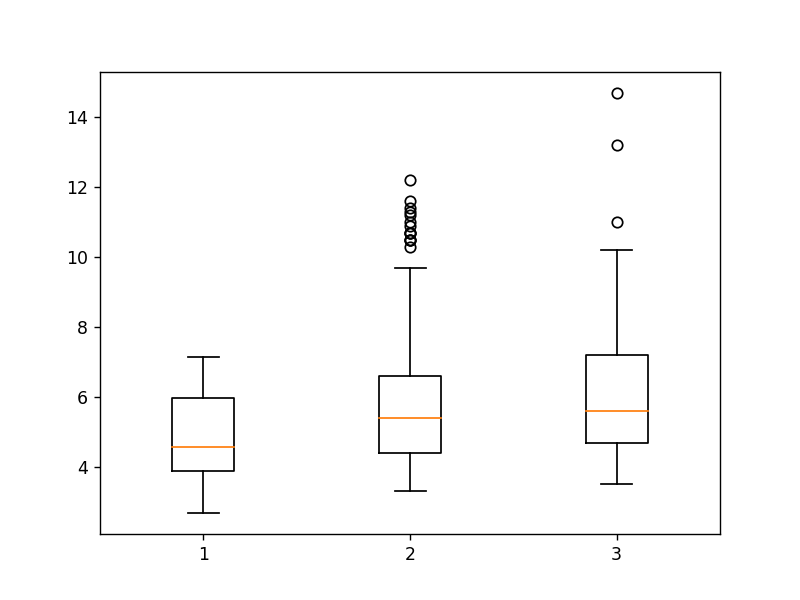

In [49]:
# Boxplot to check outlines and their values

plt.figure()
plt.boxplot([data['Mortgage_AVG_Int_Rates(%)'],data['Supply_of_New_Houses(Ratio)'],
             data['Unemployment_Rate(%)']])
plt.show()

<IPython.core.display.Javascript object>


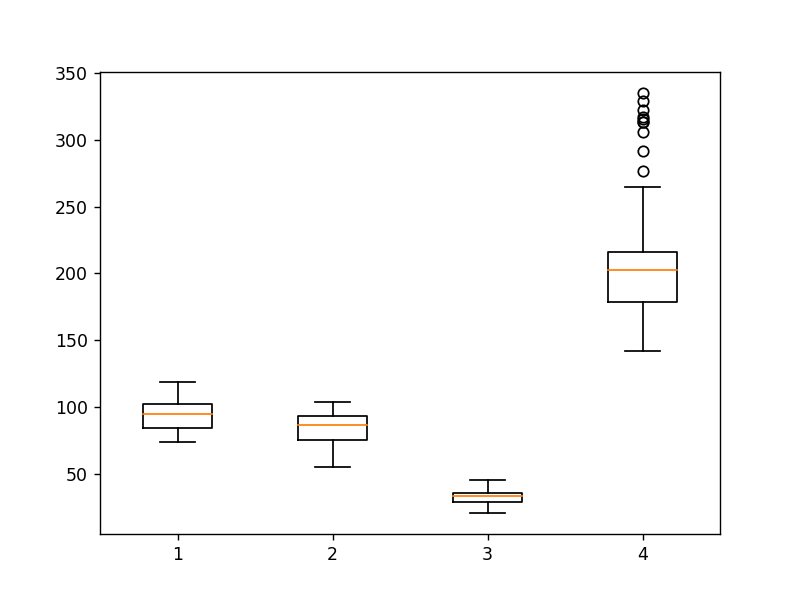

In [50]:
plt.figure()
plt.boxplot([data['Consumer_Price_Index'], data['Consumer_Sentiments_Index'], 
             data['Housing_Subsidies(Billions_of_$)'],
            data['Construction_Cost_Index']])
plt.show()

<IPython.core.display.Javascript object>


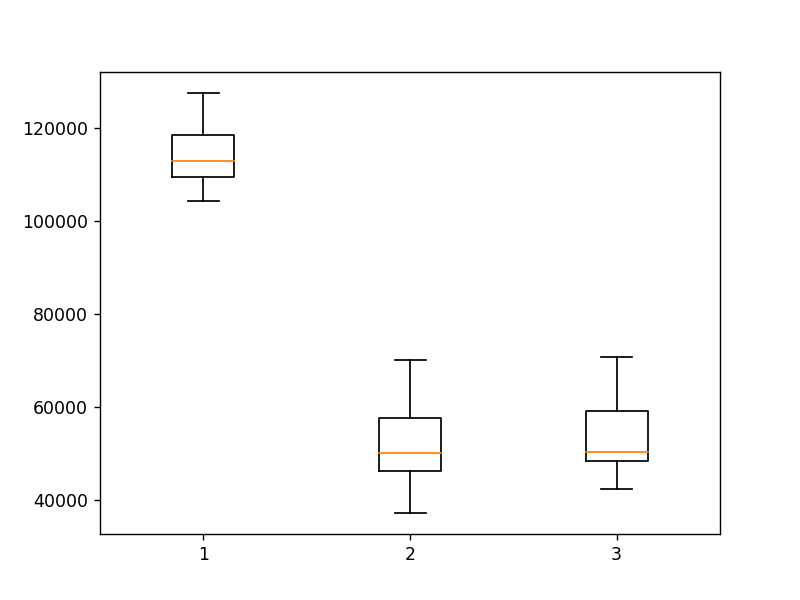

In [51]:
plt.figure()
plt.boxplot([data['Total Households(Thousands)'],data['GDP_Per_Capita($)'], 
             data['Median_Household_Income($)']])
plt.show()

<IPython.core.display.Javascript object>


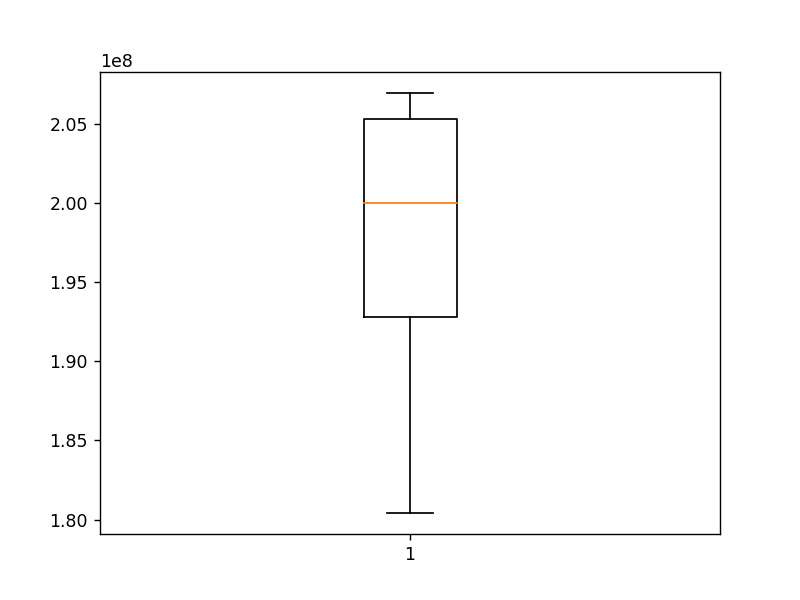

In [52]:
plt.figure()
plt.boxplot([data['Working_Population']])
plt.show()

<IPython.core.display.Javascript object>


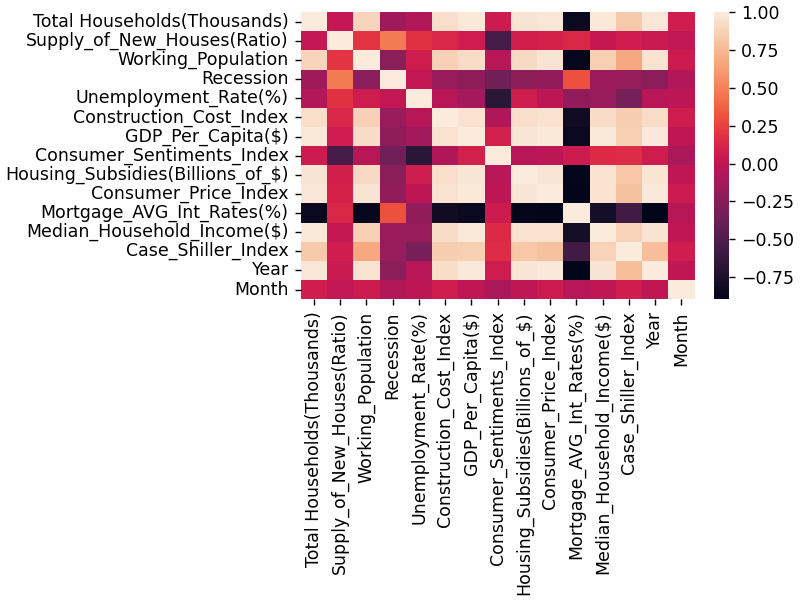

In [53]:
# A heat map represents these coefficients to visualize the strength of correlation among variables.

plt.figure(constrained_layout=True)
sns.heatmap(data.corr())
plt.show()

## As we small dataset and less features we will use Gradient Boosting Regressor and Random Forest Regressor only

### Model fitting using Gradient Boosting Regressor

#### For the Regression model, evaluation should be done using Mean Absolute Percentage Error

1. **Split** the **dataset** into **train** and **test** sets.
2. **Gradient Boosting Regressor does not require any feature scaling.**
3. **Import** and **fit the model.**
4. **Evaluate** the **loss on mean absolute error.**
5. **Predict** for **test** data.
6. **Evaluate** the **mean absolute percentage error** between **y_test and y_pred.**
7. **Plot** the all samples from **y_test and y_pred.**
8. **Plot Feature Importance.**


In [54]:
# Saperate the dataset as features(x) and target(y)

y = data['Case_Shiller_Index']

x = data[['Total Households(Thousands)', 'Supply_of_New_Houses(Ratio)',
       'Working_Population', 'Recession', 'Unemployment_Rate(%)',
       'Construction_Cost_Index', 'GDP_Per_Capita($)',
       'Consumer_Sentiments_Index', 'Housing_Subsidies(Billions_of_$)',
       'Consumer_Price_Index', 'Mortgage_AVG_Int_Rates(%)',
       'Median_Household_Income($)','Year', 'Month']]

In [55]:
# Split the dataset in train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the XGBoost Regression model

reg = GradientBoostingRegressor(loss='absolute_error')

reg.fit(x_train, y_train)

GradientBoostingRegressor(loss='absolute_error')

In [56]:
# predict on test data

y_pred1 = reg.predict(x_test)

# Evaluate mean absolute percentage error between y_test and y_pred.

from sklearn import metrics

MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred1)

Accuracy = 1 - MAPE

print('Percentage Accuracy for Test data is ' + str(Accuracy*100) + ' %')

print('\nMean Absolute Percentage Error for Test data is ' + str(MAPE*100) + ' %')


Percentage Accuracy for Test data is 98.86527516821462 %

Mean Absolute Percentage Error for Test data is 1.134724831785378 %


<IPython.core.display.Javascript object>


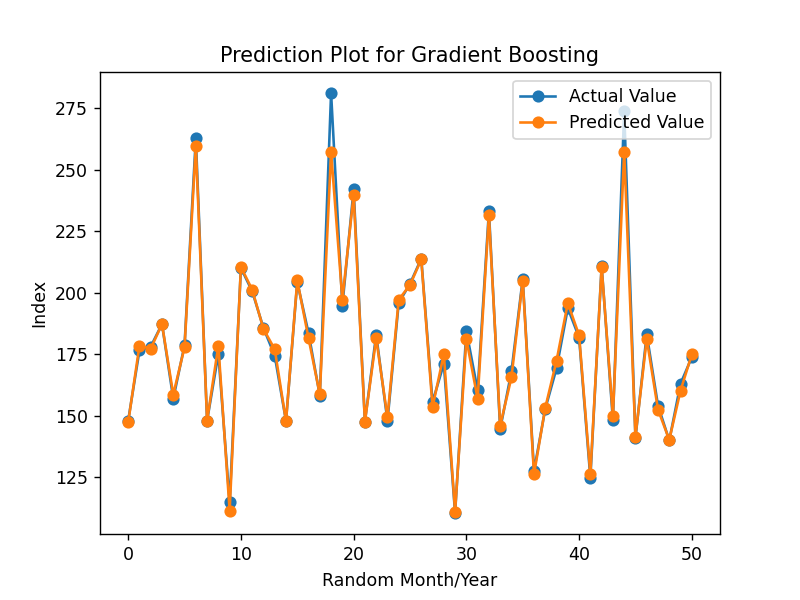

In [57]:
# Plot first test samples from y_test and y_pred

xp = np.arange(len(y_test))
y_test_plot = y_test 
y_pred_plot1 = y_pred1

plt.figure()

plt.plot(xp, y_test_plot, '-o', y_pred_plot1, '-o')

plt.xlabel('Random Month/Year')
plt.ylabel('Index')
plt.title('Prediction Plot for Gradient Boosting')
plt.legend(['Actual Value', 'Predicted Value'])
plt.savefig('Result1.jpg')
plt.show()

<IPython.core.display.Javascript object>


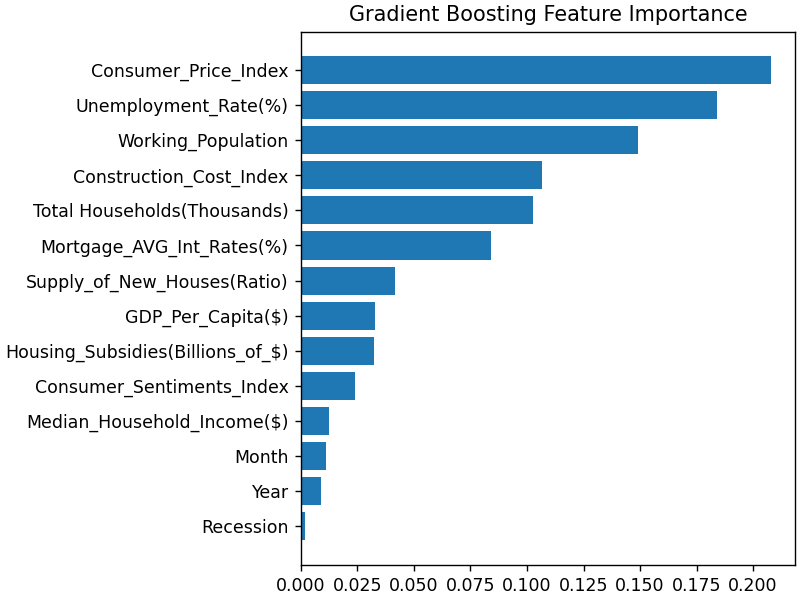

In [58]:
# Let us plot Features Importance

imp_feat = pd.Series(reg.feature_importances_, index=x.columns)
imp_feat = imp_feat.sort_values()

plt.figure(constrained_layout=True)
xval = range(len(imp_feat))
plt.barh(xval, imp_feat, tick_label=imp_feat.index)
plt.title('Gradient Boosting Feature Importance')
plt.savefig('Imp_Features1.jpg')
plt.show()

### Model fitting using Random Forest Regressor

#### For the Regression model, evaluation should be done using Mean Absolute Percentage Error

1. **Split** the **dataset** into **train** and **test** sets.
2. **Random Forest Regressor does not require any feature scaling.**
3. **Import** and **fit the model.**
4. **Evaluate** the **loss on mean absolute error.**
5. **Predict** for **test** data.
6. **Evaluate** the **mean absolute percentage error** between **y_test and y_pred.**
7. **Plot** the all samples from **y_test and y_pred.**
8. **Plot Feature Importance.**

In [59]:
# Random forest regressor

Rfr = RandomForestRegressor()

Rfr.fit(x_train, y_train)

RandomForestRegressor()

In [60]:
# predict on test data

y_pred2 = Rfr.predict(x_test)

# Evaluate mean absolute percentage error between y_test and y_pred.

from sklearn import metrics

MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred2)

Accuracy = 1 - MAPE

print('Percentage Accuracy for Test data is ' + str(Accuracy*100) + ' %')

print('\nMean Absolute Percentage Error for Test data is ' + str(MAPE*100) + ' %')

Percentage Accuracy for Test data is 99.27474186707377 %

Mean Absolute Percentage Error for Test data is 0.7252581329262324 %


<IPython.core.display.Javascript object>


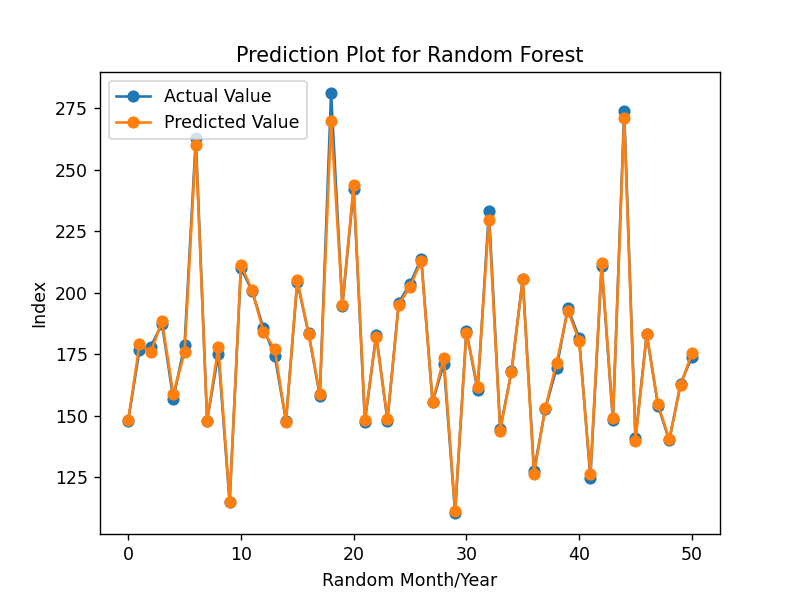

In [61]:
# Plot first test samples from y_test and y_pred

xp = np.arange(len(y_test))
y_test_plot = y_test 
y_pred_plot2 = y_pred2

plt.figure()

plt.plot(xp, y_test_plot, '-o', y_pred_plot2, '-o')

plt.xlabel('Random Month/Year')
plt.ylabel('Index')
plt.title('Prediction Plot for Random Forest')
plt.legend(['Actual Value', 'Predicted Value'])
plt.savefig('Result2.jpg')
plt.show()

<IPython.core.display.Javascript object>


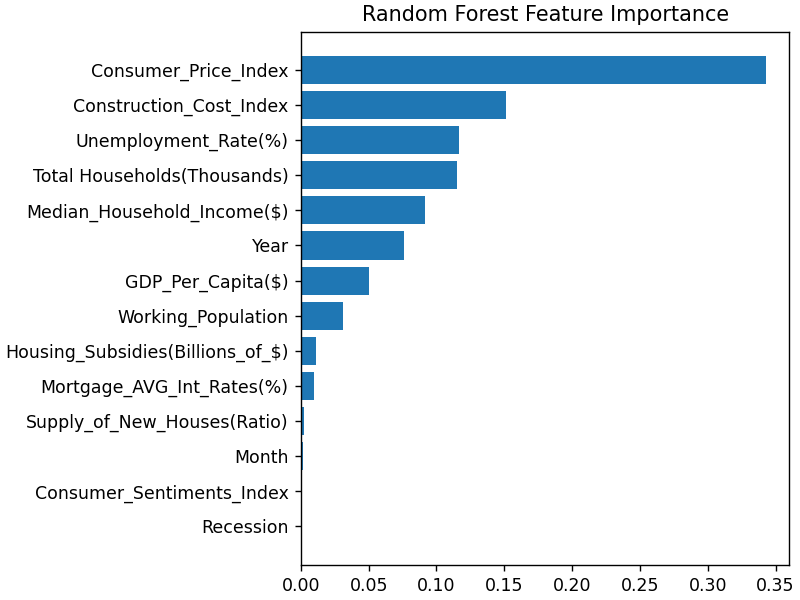

In [62]:
# Let us plot Features Importance

imp_feat = pd.Series(Rfr.feature_importances_, index=x.columns)
imp_feat = imp_feat.sort_values()

plt.figure(constrained_layout=True)
xval = range(len(imp_feat))
plt.barh(xval, imp_feat, tick_label=imp_feat.index)
plt.title('Random Forest Feature Importance')
plt.savefig('Imp_Features2.jpg')
plt.show()